# Assignment 7
## Brian Goggin
In this assignment, I import data from the San Francisco development pipeline from SF Open data's API. I import quarterly data from the fourth quarter of 2012 to the second quarter of 2016. In the first section of the notebook, I import, append, and clean the data. In the second section, I create 4 graphs to explore the data. 


## Section 1: Import and Clean Data

First, import the packages necessary for calling an API. 

In [35]:
#import packages
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import re as re
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs
import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()
from altair import *

The SF Planning Department releases this data quarterly. Quarterly reports go back all the way to 2012. However, this data is messy and inconsistent. Therefore, for the purposes of this assignment, I have preserved some of the code in comments 

In [36]:
Q22016 = 'https://data.sfgov.org/resource/3n2r-nn4r.json'
Q12016 = 'https://data.sfgov.org/resource/6iid-qfaz.json'
Q42015 = 'https://data.sfgov.org/resource/6jnk-ty34.json'
Q32015 = 'https://data.sfgov.org/resource/8qip-pyye.json'
Q22015 = 'https://data.sfgov.org/resource/b6nb-tyvq.json'
Q12015 = 'https://data.sfgov.org/resource/auw5-vpae.json'
Q42014 = 'https://data.sfgov.org/resource/ia2z-a7eh.json'
Q32014 = 'https://data.sfgov.org/resource/9xqb-guwy.json' #Problem - this json does not have best date information that the raw csv file does
Q22014 = 'https://data.sfgov.org/resource/tkr2-mzci.json'
Q12014 = 'https://data.sfgov.org/resource/fq62-z4pc.json'
Q42013 = 'https://data.sfgov.org/resource/s42z-x9np.json'
Q32013 = 'https://data.sfgov.org/resource/h2ky-3rra.json'
Q22013 = 'https://data.sfgov.org/resource/ixti-hd8i.json'
Q12013 = 'https://data.sfgov.org/resource/662u-bk2r.json'
Q42012 = 'https://data.sfgov.org/resource/fpzh-9ii5.json'

Next, I define a function for importing the data from each API into a dataframe.

In [37]:
def importdata(quarter, quartervalue, field1, field2, field3, field4, field5, field6, field7, field8, field9, geogfield1, geogfield2):
    '''
    This function calls the API endpoint quarter and returns a dataframe with the desired columns.
    field1=geogfield2 represent the desired fields as they are named at the API endpoint
    '''
    
    def includekey(field):
        '''
        This function takes a given field from the API endpoint and creates a list out of its entires.
        '''
        list = []
        for item in data: 
            if field in item.keys():
                list.append(item[field])
            else:
                list.append(np.nan)
        return list

    def include_coor_key(one, two):
        '''
        This function takes a given geographic field from the API endpoint and creates a list out of its entires.
        '''
        list = []
        for item in data: 
            if one in item.keys():
                list.append(item[one][two])
            else:
                list.append(np.nan)
        return list
    
    response = requests.get(quarter)
    results = response.text
    data = json.loads(results) #data is a list at this point
    
    #import fields
    d = {}
    d['lot_number'] = includekey(field1)
    d['address'] = includekey(field2)
    d['status'] = includekey(field3)
    d['latest_date'] = includekey(field4)
    d['units'] = includekey(field5)
    d['net_units'] = includekey(field6)
    d['affordable_units'] = includekey(field7)
    d['net_affordable_units'] = includekey(field8)
    d['zone'] = includekey(field9)
    d['lat_lon'] = include_coor_key(geogfield1, geogfield2)
    
    df = pd.DataFrame.from_dict(d)
    df['quarter'] = quartervalue
    
    return df

Import all of the data (one for each quarter).

In [38]:
Q22016df = importdata(Q22016, 'Q22016', 'apn', 'nameaddr', 'beststat', 'bestdate', 'units', 'unitsnet', 'aff', 'affnet', 'zoning_sim', 'location', 'coordinates')   
Q12016df = importdata(Q12016, 'Q12016', 'apn', 'nameaddr', 'beststat', 'bestdate', 'units', 'unitsnet', 'affordable', 'affordable_net', 'zoning', 'location', 'coordinates')
Q42015df = importdata(Q42015, 'Q42015','apn', 'nameaddr', 'beststat', 'bestdate', 'units', 'unitsnet', 'affordable', 'affordab_1', 'zoning_sim', 'geography', 'coordinates')
Q32015df = importdata(Q32015, 'Q32015','apn', 'nameaddr', 'beststat', 'bestdate', 'units', 'unitsnet', 'affordable', 'affordablenet', 'zoning_sim', 'location', 'coordinates')
Q22015df = importdata(Q22015,'Q22015', 'apn', 'nameaddr', 'beststat', 'bestdate', 'units', 'unitsnet', 'affordable', 'affordablenet', 'zoning_sim', 'geography', 'coordinates')
Q12015df = importdata(Q12015, 'Q12015','blklot', 'nameaddr', 'beststat', 'bestdate', 'units', 'unitsnet', 'aff', 'affnet', 'zoning_sim', 'geography', 'coordinates')
Q42014df = importdata(Q42014, 'Q42014','blklot', 'nameaddr', 'beststat', 'bestdate', 'units', 'unitsnet', 'affordable', 'affnet', 'zoning_sim', 'geography', 'coordinates')
Q32014df = importdata(Q32014, 'Q32014','block_lot', 'location_1_address', 'best_stat', 'best_date', 'units', 'net_added_units', 'affordable', 'affnet', 'zoning', 'location_1', 'coordinates')
Q22014df = importdata(Q22014, 'Q22014','block_lot', 'location_1_address', 'best_stat', 'best_date', 'units', 'net_added_units', 'affordable', 'affordablenet', 'zoning_simplified', 'location_1', 'coordinates')
Q12014df = importdata(Q12014,'Q12014', 'block_lot', 'location_1_address', 'best_stat', 'best_date', 'units', 'net_added_units', 'affordable', 'affordablenet', 'zoning_simplified', 'location_1', 'coordinates')
Q42013df = importdata(Q42013,'Q42013', 'block_lot', 'location_1_address', 'best_stat', 'best_date', 'units', 'net_added_units', 'affordable', 'affordablenet', 'zoning_simplified', 'location_1', 'coordinates')
Q32013df = importdata(Q32013, 'Q32013','block_lot', 'location_1_address', 'best_stat', 'best_date', 'units', 'net_added_units', 'affordable', 'affordablenet', 'zoning_simplified', 'location_1', 'coordinates')
Q22013df = importdata(Q22013, 'Q22013','block_lot', 'location_1_address', 'best_stat', 'best_date', 'units', 'net_added_units', 'affordable', 'affordablenet', 'zoning_simplified', 'location_1', 'coordinates')
Q12013df = importdata(Q12013, 'Q12013','block_lot', 'location_1_address', 'best_stat', 'best_date', 'units', 'net_added_units', 'affordable', 'affordablenet', 'zoning_simplified', 'location_1', 'coordinates')
Q42012df = importdata(Q42012, 'Q42012','block_lot', 'location_1_address', 'best_stat', 'best_date', 'units', 'net_added_units', 'affordable', 'affordablenet', 'zoning_simplified', 'location_1', 'coordinates')



Append the dataframes together for one panel dataset.

In [39]:
#Append data together
quarters = [Q12016df, Q42015df, Q32015df, Q22015df, Q12015df, Q42014df, 
            Q32014df, Q22014df, Q12014df, Q42013df, Q32013df, Q22013df, Q12013df,
           Q42012df]
full_df = Q22016df.append(quarters)
full_df.shape

(14909, 11)

Clean data after appending.

In [40]:
#Clean data after importing
full_df['lon'] = full_df['lat_lon'].astype(str).str.split(',').str[0].str.strip('[')
full_df['lat'] = full_df['lat_lon'].astype(str).str.split(',').str[1].str.strip(']')
full_df['net_units'] = full_df['net_units'].astype(float) #convert to float
full_df['units'] = full_df['units'].astype(float) #convert to float
full_df['net_affordable_units'] = full_df['net_affordable_units'].astype(float) #convert to float
full_df['affordable_units'] = full_df['affordable_units'].astype(float) #convert to float
full_df['lot_number'] = full_df['lot_number'].str.strip('APN ').str.zfill(7)

In this step, I filter out projects that have no impact on residential development. I define these as those projects with either both zeros for total units and total net units constructed or both nulls for total units and total net units constructed.

In [41]:
#filter out those observations that have no impact on residential construction (0 or null net units and 0 or null units)
full_df = full_df[(full_df['units'] != 0) | (full_df['net_units'] != 0)]
full_df = full_df[(full_df['units'].notnull()) | (full_df['net_units'].notnull())]


In this step, I create a new variable to order the quarters in the dataset.

In [42]:
#create a dictionary for which quarter a project is in and then sort by quarters
quarter_dict = {'Q22016': 16, 'Q12016': 15, 'Q42015': 14, 'Q32015': 13, 'Q22015': 12, 'Q12015': 11, 'Q42014': 10, 
                'Q32014': 9, 'Q22014': 8, 'Q22014': 7, 'Q12014': 6, 'Q42013': 5, 'Q32013': 4, 'Q22013': 3, 
                'Q12013': 2, 'Q42012': 1}

full_df['quarter_order'] = full_df['quarter'].map(quarter_dict)
full_df.sort_values(['lot_number', 'quarter_order'], ascending=True, inplace = True)

Finally, I clean up the project status variable.

In [43]:
#Clean status column
def change(value):
    if value['status'] == 'BP Filed': 
        field = 'BP FILED'
        
    elif value['status'] == 'PL Filed':
        field = 'PL FILED'
        
    elif value['status'] == 'PL Approved':
        field = 'PL APPROVED'
        
    else: 
        field = value['status']
    return field


full_df['status'] = full_df.apply(change, axis = 1)

In [44]:
full_df['status'].value_counts() #check to see that each category is mutually exclusive

BP FILED         5427
CONSTRUCTION     2705
BP ISSUED        1899
PL FILED         1607
PL APPROVED      1142
BP APPROVED       482
BP REINSTATED     307
Name: status, dtype: int64

# Step 2: Make Data Visualizations

## Graph 1: Current Development Status

First, I graph the amount of net units by the status of the projects. 

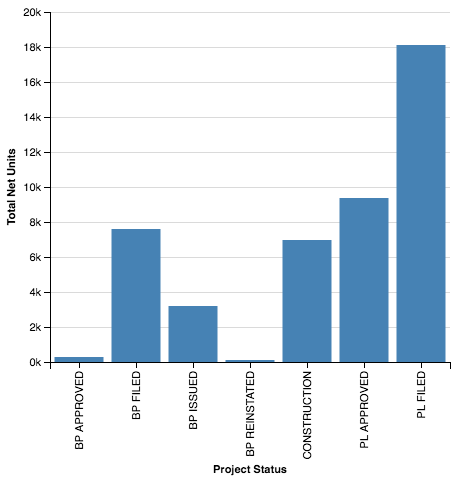

In [45]:
#Bar graph of current development snapshot
data = full_df[full_df['quarter'] == 'Q22016']

#drop some outliers (greater than 10,000 units)
data = data[data['net_units'] < 5000]

Chart(data).mark_bar().encode(
    x=X('status', axis = Axis(title = 'Project Status')), 
    y=Y('sum(net_units)', axis = Axis(title = 'Total Net Units')), 
).configure_scale(
    bandSize=50  # scale.bandSize adjusts thickness (in pixels) of bars
).configure_cell(
    width=200  # cell.width adjusts the width (in pixels) of the chart
)



The above graph shows the total number of net units (additions minus demolitions) currently on the docket in San Francisco by the status. Interestingly, the largest category are projects that have filed for planning review but not yet received planning approval. To put this in context, the total number of new units allocated for San Francisco County as part of the Association of Bay Area Government's (ABAG) Regional Housing Needs Assessment is 28,869 (pg. 24). This is the amount of housing that state and local law mandate that San Francisco has to plan for between 2014-2022. If about 7,000 new units are constructed every year, it would appear that San Francisco is on track.

## Graph 2: Total versus Net Units

Next, I chart the amount of net units versus total units by project.

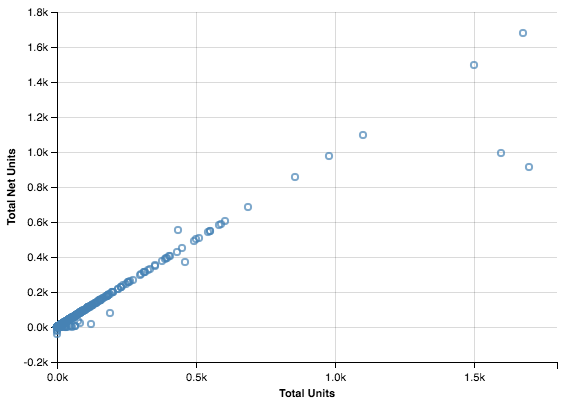

In [46]:
#drop even more outliers for scatter plot (greater than 2,000 units)
data = data[data['net_units'] < 2000]

Chart(data).mark_point().encode(
    x=X('units', axis = Axis(title = 'Total Units')),
    y=Y('net_units', axis = Axis(title = 'Total Net Units')),
)

This scatter plot shows the relationship between units and net units for all residential projects in the second quarter of 2016. This mostly follows a straight line, illustrating that the new units added for most projects is equivalent to the gains in units for that lot. Furthermore, notice that most of the projects have positive total net units, indicating that almost every project adds more units than it takes away. 

## Graph 3: Market Rate Versus Affordable Units

Next, I chart the amount of total net units versus total net affordable.

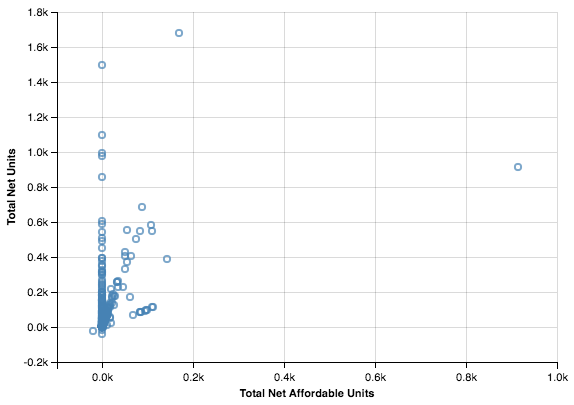

In [47]:
Chart(data).mark_point().encode( 
    x=X('net_affordable_units', axis = Axis(title = 'Total Net Affordable Units')),
    y=Y('net_units', axis = Axis(title = 'Total Net Units')),
)

This scatter plot shows total net units compared to total net affordable units built on site. Affordable units are those typically built for people between 20% and 60% of the area's median income. As we can see in the plot above, most projects add far more market-rate units than affordable units. However, there are some interesting outliers, such as the project at the far right end of the chart. This is Hope SF Sunnydale, a project by the San Francisco Housing Authority that will add 915 units of affordable housing.

## Graph 4: Total Net Units Built Over Time

Finally, I chart the total net units built over time (Quarter 4 2012 - Quarter 2 2016).

First, I assume that units were constructed in the latest quarter for which the project had "construction" as a project status. I identify these observations.

In [48]:
#create dataframes for line graph of construction, BP, and BI starts over time
cons_end = full_df[full_df['status'] == "CONSTRUCTION"].groupby(['lot_number'], as_index=False)['quarter_order'].max()
cons_end.rename(columns = {'quarter_order': 'consdate'}, inplace = True)
#merge data together to identify quarter that projects were built
full_df2 = full_df.merge(cons_end, on = 'lot_number', how = "outer")
full_df2 = full_df2[full_df2['consdate'] == full_df2['quarter_order']]
full_df2 = full_df2[full_df2['quarter_order'] != 16]


In [ ]:
#Finally, create a quarter variable that is more readable for the x-axis. 
quarter_dict = {'Q22016': '2016-Q2', 'Q12016': '2016-Q1', 'Q42015': '2015-Q4', 'Q32015': '2015-Q3', 'Q22015': '2015-Q2', 
                'Q12015': '2015-Q1', 'Q42014': '2014-Q4', 'Q32014': '2014-Q3', 'Q22014': '2014-Q2', 'Q12014': '2014-Q1', 
                'Q42013': '2013-Q4', 'Q32013': '2013-Q3', 'Q22013': '2013-Q2', 
                'Q12013': '2013-Q1', 'Q42012': '2012-Q4'}

full_df2['quarter2'] = full_df2['quarter'].map(quarter_dict)

In [ ]:
Chart(full_df2).mark_area().encode(
    x=X('quarter2', axis = Axis(title = 'Quarter')),
    y=Y('sum(net_units):Q', axis = Axis(title = 'Total Net Units Built')),
).configure_cell(
    height=300.0,
    width=1000.0,
)

Finally, I chart total net units built over time where the x-axis is the quarter of the year (e.g. Q1 is January 1 - March 31). The time period spans from the fourth quarter of 2012 to the first quarter of 2016. The chart shows that units built vary a lot over time and there does not appear to be a clear trend towards more or less construction. If anything, there has been more units completed in recent quarters than in the beginning of the time period. 